<a href="https://colab.research.google.com/github/swhaley01/Coding-Dojo/blob/main/Sales_Predictions_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
Sales = pd.read_csv('/content/drive/MyDrive/Coding Dojo/1 - DS Fundamentals/DS Fundamentals-Week1/sales_predictions.csv')

In [62]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [63]:
Sales.shape

(8523, 12)

There are 8523 rows and 12 columns.

2) What are the datatypes of each variable?

In [64]:
Sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Here are the data types of each variable.

3) Are there duplicates? If so, drop any duplicates.

In [65]:
Sales.duplicated().any()

False

There are no duplicates in this dataset.

4) Identify missing values.

In [66]:
Sales.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

Item_Weight and Outlet_Size have nas present

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [67]:
Sales['Item_Weight'].fillna(value =  Sales['Item_Weight'].mean(),inplace = True)
Sales['Outlet_Size'].fillna(value = 'Medium', inplace = True)

6) Confirm that there are no missing values after addressing them.

In [68]:
Sales.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [69]:
Sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [70]:
Sales['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)
Sales['Item_Fat_Content'].replace(['reg'], 'Regular', inplace=True)

In [71]:
Sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [72]:
Sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [73]:
Sales['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [74]:
Sales['Outlet_Size'].replace(['High'], 'Large', inplace=True)

In [75]:
Sales['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [76]:
Sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [77]:
Sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [78]:
print(Sales['Item_Weight'].min())
print(Sales['Item_Visibility'].min())
print(Sales['Item_MRP'].min())
print(Sales['Item_Outlet_Sales'].min())
print(Sales['Outlet_Establishment_Year'].min())

4.555
0.0
31.29
33.29
1985


In [79]:
print(Sales['Item_Weight'].max())
print(Sales['Item_Visibility'].max())
print(Sales['Item_MRP'].max())
print(Sales['Item_Outlet_Sales'].max())
print(Sales['Outlet_Establishment_Year'].max())

21.35
0.328390948
266.8884
13086.9648
2009


In [80]:
print(Sales['Item_Weight'].mean())
print(Sales['Item_Visibility'].mean())
print(Sales['Item_MRP'].mean())
print(Sales['Item_Outlet_Sales'].mean())
print(Sales['Outlet_Establishment_Year'].mean())

12.857645184136409
0.06613202877895127
140.9927819781768
2181.2889135750365
1997.8318667135984


In [81]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


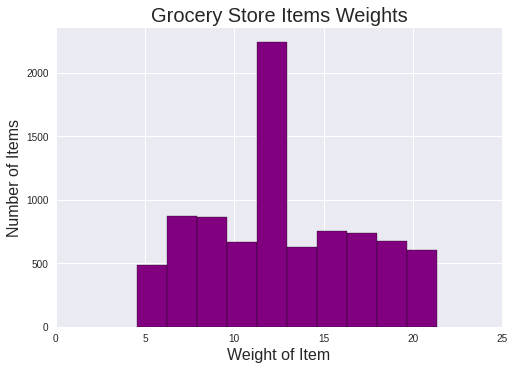

In [82]:
plt.style.use('seaborn')
Sales['Item_Weight'].hist(edgecolor='black', color='purple')

plt.xticks([0, 5, 10, 15, 20, 25])
plt.title('Grocery Store Items Weights', fontsize=20)
plt.xlabel('Weight of Item', fontsize=16)
plt.ylabel('Number of Items', fontsize=16);

Text(0, 0.5, 'Number of Stores Established')

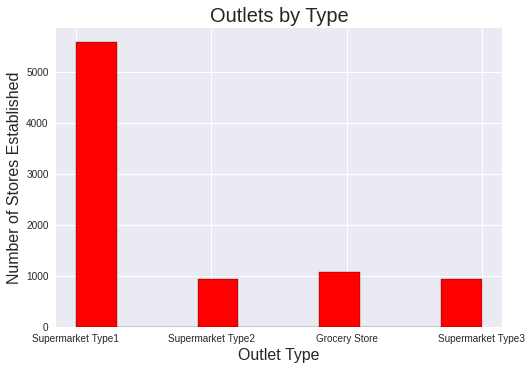

In [83]:
plt.style.use('seaborn')
Sales['Outlet_Type'].hist(edgecolor='black', color='red')

#plt.xticks([0, 5, 10, 15, 20, 25])
plt.title('Outlets by Type', fontsize=20)
plt.xlabel('Outlet Type', fontsize=16)
plt.ylabel('Number of Stores Established', fontsize=16)

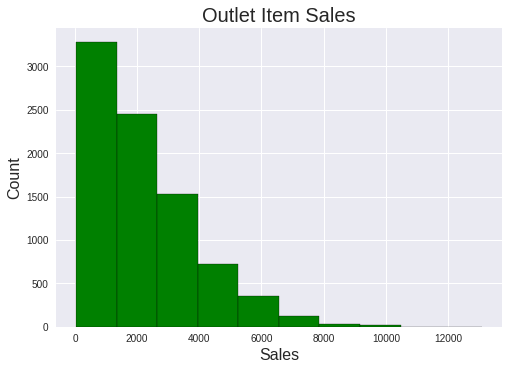

In [84]:
plt.style.use('seaborn')
Sales['Item_Outlet_Sales'].hist(edgecolor='black', color='green')

plt.title('Outlet Item Sales', fontsize=20)
plt.xlabel('Sales', fontsize=16)
plt.ylabel('Count', fontsize=16);

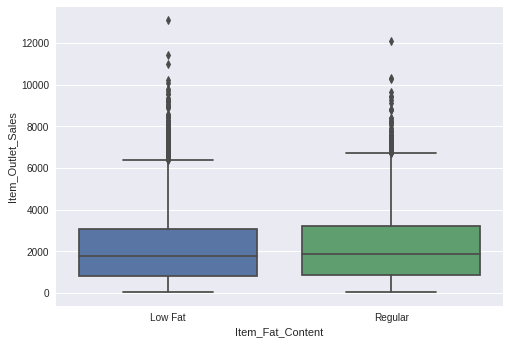

In [87]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=Sales)

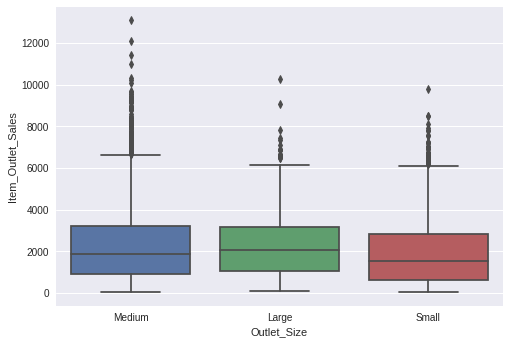

In [86]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Sales)

In [89]:
corr = Sales.corr()

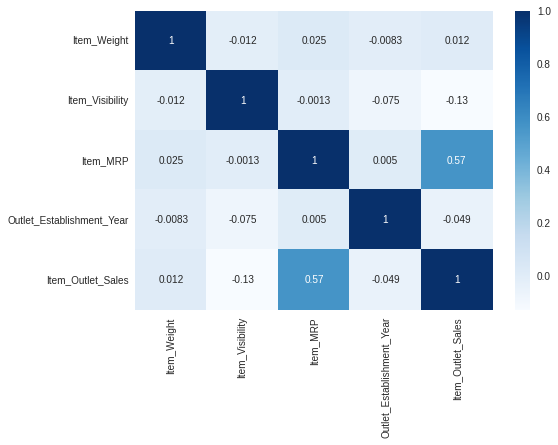

In [91]:
sns.heatmap(corr, cmap = 'Blues', annot = True)